# Intuition

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
import seaborn as sns
from scipy.io import wavfile
import IPython.display as ipd

## Measurement of a resistor

<img src='assets/circuit.png'>
    
The resistance $R$ obeys the Ohm's law:
$$ V = R I $$

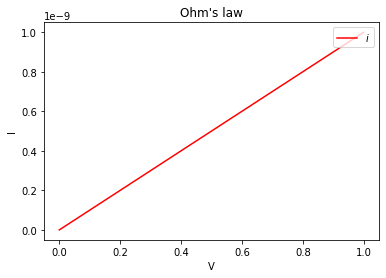

In [2]:
N_points = 1000
R = 1e9 
v = np.linspace(0, 1, N_points)
i = v/R

fig = plt.figure()
sns.lineplot(v, i, color='r', label='$i$')
plt.title("Ohm's law")
plt.xlabel('V')
plt.ylabel('I')
plt.legend(loc='upper right')

## Noisy measurement

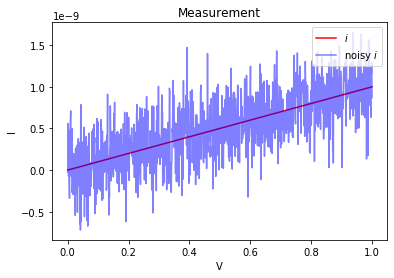

In [3]:
mu = 0
sigma = 3e-10
noise = np.random.normal(mu, sigma, N_points)
noisy_i = i + noise

fig = plt.figure()
sns.lineplot(v, i, color='r', label='$i$')
sns.lineplot(v, noisy_i, color='b', alpha=0.5, label='noisy $i$')
plt.title('Measurement')
plt.xlabel('V')
plt.ylabel('I')
plt.legend(loc='upper right')

## Average the noisy signal

In [4]:
@interact(N_average=widgets.IntSlider(min=0, max=1000, step=1, value=10))
def averaging(N_average):
    average_i = 1/N_average*np.sum([np.hstack([np.zeros(N_average-k), noisy_i, np.zeros(k)]) 
                                     for k in range(N_average)], 
                                    axis=0)
    fig = plt.figure()
    sns.lineplot(v, i, color='r', label='$i$')
    sns.lineplot(v, average_i[:-N_average], color='b', alpha=0.5, label='average $i$')
    plt.title('Averaged measurement')
    plt.xlabel('V')
    plt.ylabel('I')

interactive(children=(IntSlider(value=10, description='N_average', max=1000), Output()), _dom_classes=('widget…

## Introduce the convolution
Notice how this averaging method cleans the signal. What we need to realize here is that we just performed a convolution of our noisy signal with a rectangular function. The mathematical definition of the convolution of the functions $f$ and $g$ wrtitten $f*g$ is:
$$ s(t) = (f*g)(t) = \int_{-\infty}^{-\infty} f(\tau)g(t-\tau) d\tau $$
in our case here, the signal output by the sensor is discrete. In this case, the convolution is expressed as:
$$ s(t) = (f*g)(t) = \sum_{n=-\infty}^{-\infty} f(n)g(t-n)$$

In [5]:
@interact(width=widgets.IntSlider(min=0, max=1000, step=1, value=10))
def rectangular_convolution(width):
    rectangular_function = 1/width*np.ones(width)
    rectangular_convolved_xs = np.convolve(noisy_i, rectangular_function, mode='same')
    fig = plt.figure()
    sns.lineplot(v, i, color='r', label='$i$')
    sns.lineplot(v, rectangular_convolved_xs, color='b', alpha=0.5, label='rectangular convolved i')
    plt.title('Convolution of i and a rectangular function')
    plt.xlabel('t')
    plt.ylabel('x')
    plt.legend(loc='upper right')

interactive(children=(IntSlider(value=10, description='width', max=1000), Output()), _dom_classes=('widget-int…

We could typically replace this rectangular function with whatever functions we like. 

There are many nice animations online about convolution like this one from wikipedia:
<img src='https://upload.wikimedia.org/wikipedia/commons/6/6a/Convolution_of_box_signal_with_itself2.gif'>

## Another example of convolution: audio echo

In [8]:
wav_sample = 'assets/taunt.wav'

ipd.Audio(wav_sample)

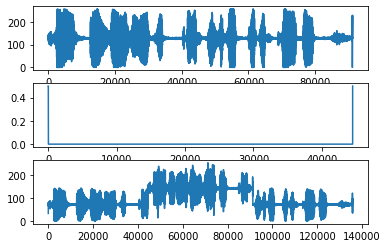

In [59]:
output_wav = 'echo.wav'
def add_echo(input_wav, output_wav, width, delay):
    rate, wav = wavfile.read(input_wav)
    echo_convolution = np.hstack([1/int(width*rate)*np.ones(int(width*rate)), 
                                  np.zeros((int(delay*rate))), 
                                  1/int(width*rate)*np.ones(int(width*rate))])
#     from IPython.core.debugger import Tracer; Tracer()() 
    echo = np.convolve(wav, echo_convolution, mode='fft')
    echo = echo/echo.max()*255
    wavfile.write(output_wav, rate, echo)
    return wav, echo, echo_convolution
    
wav, echo, echo_convolution = add_echo(wav_sample, output_wav, 0.0001, 2)

fig, ax = plt.subplots(3,1)
ax[0].plot(range(len(wav)), wav)
ax[1].plot(range(len(echo_convolution)), echo_convolution)
ax[2].plot(range(len(echo)), echo)

In [42]:
np.sum(echo_convolution)

0.9999999999999999

In [52]:
echo.max()

224.5